In [1]:
import os
import sys

# JAX
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp

# Matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 15

# Internal modules
from diffPLOG2TROE.pressure_logarithmic import kinetic_constant_plog
from diffPLOG2TROE.three_body import kinetic_constant_threebody

### Stagni et al. mechanism
```
NH3=NH2+H       .3497E+31 -5.224  111163.3
PLOG / 0.1	.7230E+30 -5.316  110862.4 /
PLOG / 1	.3497E+31 -5.224  111163.3 /
PLOG / 10	.1975E+32 -5.155  111887.8 /
PLOG / 100	.2689E+32 -4.920  112778.7 /
```
### Zhu et al. mechanism
```
NH3+M<=>H+NH2+M   2.860E+16    0.0E+00    9.347E+04
```

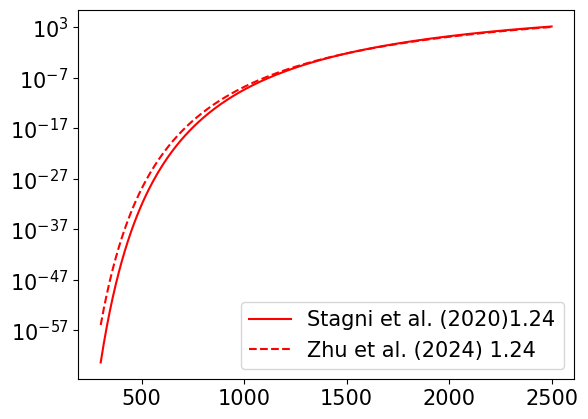

In [2]:
stagni = jnp.array([
    [0.1, .7230E+30, -5.316, 110862.4],
    [1, .3497E+31, -5.224, 111163.3],
    [10, .1975E+32, -5.155, 111887.8],
    [100, .2689E+32, -4.920, 112778.7]
], dtype=jnp.float64)

zhu = jnp.array([2.860E+16, 0.0E+00, 9.347E+04], dtype=jnp.float64)

T_range = jnp.linspace(300, 2500, 300) # K
P_range = [0.1, 1.24, 10, 100] # atm
P_range = [1.24] # atm

colors = ["r", "g", "b", "m"]
count = 0
for P in P_range:
    k_stagni = []
    k_zhu = []
    for T in T_range:
        k_stagni.append(kinetic_constant_plog(stagni, T, P))
        k_zhu.append(kinetic_constant_threebody(zhu, T, P)[0])
    plt.plot(T_range, k_stagni, "-", color=colors[count], label=f"Stagni et al. (2020){P}")
    plt.plot(T_range, k_zhu, "--", color=colors[count], label=f"Zhu et al. (2024) {P}")
    count += 1

plt.yscale("log")
plt.legend()
plt.show()

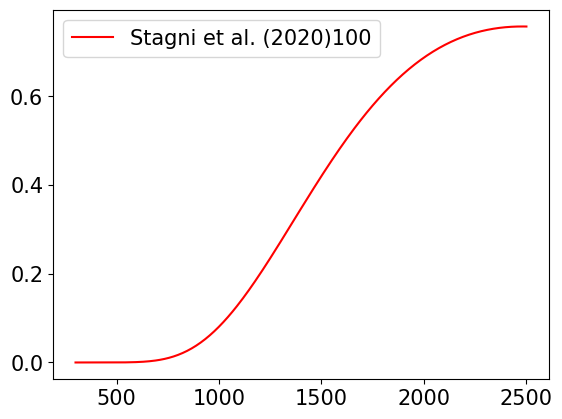

In [3]:
stagni = jnp.array([
    [0.1, .7230E+30, -5.316, 110862.4],
    [1, .3497E+31, -5.224, 111163.3],
    [10, .1975E+32, -5.155, 111887.8],
    [100, .2689E+32, -4.920, 112778.7]
], dtype=jnp.float64)

zhu = jnp.array([2.860E+16, 0.0E+00, 9.347E+04], dtype=jnp.float64)

T_range = jnp.linspace(300, 2500, 300) # K
P_range = [0.1, 1.24, 10, 100] # atm
P_range = [100] # atm

colors = ["r", "g", "b", "m"]
count = 0
for P in P_range:
    k_stagni = []
    k_zhu = []
    for T in T_range:
        k_stagni.append(kinetic_constant_plog(stagni, T, P))
        k_zhu.append(kinetic_constant_threebody(zhu, T, P)[0])
        k_ratio=[k_stagni[i]/k_zhu[i] for i, _ in enumerate(k_stagni)]
    plt.plot(T_range, k_ratio, "-", color=colors[count], label=f"Stagni et al. (2020){P}")
    count += 1

# plt.yscale("log")
plt.legend()
plt.show()